5.3.A

20000 2.9443664472000647e-09


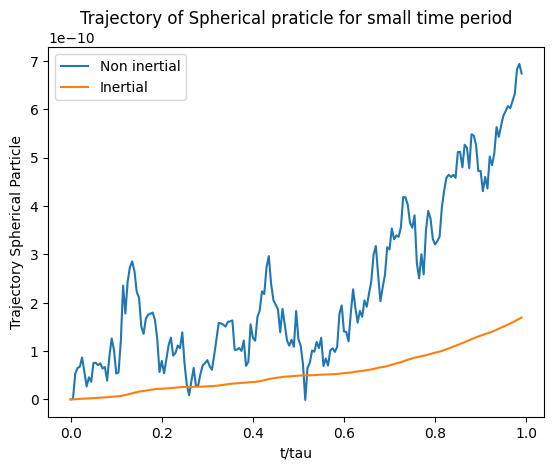

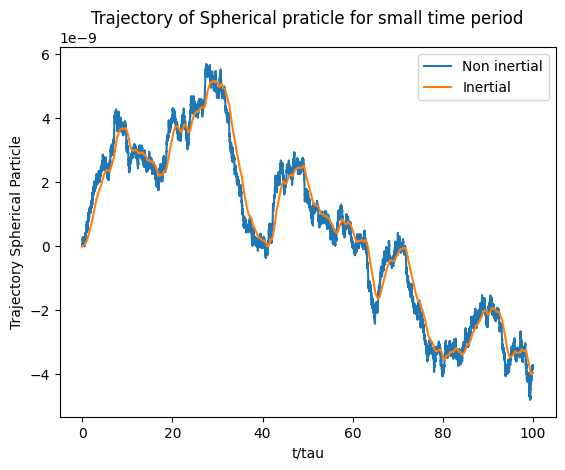

Ensemble averged MSD 1.987842982059189e-17
Ensemble averged MSD 1.987842982059189e-17


In [16]:
import numpy as np
import matplotlib.pyplot as plt

N = 1  # number of trajectory
radius = 1e-6
m = 1.11*10**(-14)
eta = 0.001 
gamma = 6*np.pi*eta*radius
Temperature= 300
kb = 1.380649*10**(-23)
tau = m/gamma #0.588 # value from book

dt = 0.005*tau  #dt should be smaller than 0.1tau so divided by 5
length = 100*tau
T=int(length/dt) #time step
print(T,dt)


w = np.random.normal(0,1,size=(T,1))
w=w.flatten()
x=0
y=0
path_wo_mass=[]
path_mass=[]
path_wo_mass.append(x)
path_wo_mass.append(x)
path_mass.append(y)
path_mass.append(y)
temp_time=0
time_list=[]
time_list.append(temp_time)
time_list.append(temp_time)


def next_position_without_mass (previous_pos,wi):

    next_pos = previous_pos + np.sqrt(2*kb*
                                      Temperature*dt/gamma)*wi

    return next_pos

def next_position_with_mass (before_pre_position, 
                             previous_pos, wi):

    denominator_1 = 1+ (dt*gamma/m)
    term_1 = (2+ (dt*gamma/m)) / denominator_1
    term_2 = 1/denominator_1
    term_3 =  np.sqrt(2*kb*Temperature*gamma)*dt**(3/2)*wi/(m*
                                                            denominator_1)

    next_post = term_1*previous_pos - term_2 *before_pre_position + term_3


    return next_post

for i in range(T):
    x = next_position_without_mass(path_wo_mass[-1], w[i])
    path_wo_mass.append(x)

    y = next_position_with_mass (path_mass[-2],path_mass[-1], w[i])
    path_mass.append(y)

    temp_time = temp_time+ dt/tau
    time_list.append(temp_time)




# plt.figure(figsize = (20,6))

plt.subplot(1,1,1)
plt.plot(time_list[0:200], path_wo_mass[0:200], label= 'Non inertial')
plt.plot(time_list[0:200], path_mass[0:200], label= 'Inertial')
plt.xlabel('t/tau')
plt.ylabel('Trajectory Spherical Particle')
plt.title("Trajectory of Spherical praticle for small time period")
plt.legend()
plt.show()
plt.subplot(1,1,1)
plt.plot(time_list, path_wo_mass, label= 'Non inertial')
plt.plot(time_list, path_mass, label= 'Inertial')
plt.xlabel('t/tau')
plt.ylabel('Trajectory Spherical Particle')
plt.title("Trajectory of Spherical praticle for small time period")
plt.legend()
plt.show()
    
def compute_time_averaged_msd(path):
    timestep= len(path)
    time_averaged_msd = np.zeros(timestep)

    for t in range(timestep):
        squared_displacements = [(path[t + x] - path[x])**2 
                                 for x in range(timestep - t)]
        time_averaged_msd[t] = np.mean(squared_displacements)
    # for t in range(1, timestep):
    #     squared_displacements = (path[t:] - path[:-t])**2
    #     time_averaged_msd[t] = np.mean(squared_displacements)
    return time_averaged_msd

path_wo_mass= np.array(path_wo_mass)
path_mass = np.array(path_mass)

msd_wo_mass = compute_time_averaged_msd(path_wo_mass)
# print(msd_wo_mass)

msd_mass =  compute_time_averaged_msd(path_mass)

# plt.loglog(time_list, msd_wo_mass, label= 'Non inertial')
# plt.loglog(time_list, msd_mass, label= 'inertial')
# plt.legend()
# plt.show()

average_msd_wo_mass = np.mean(msd_wo_mass)
average_msd_mass = np.mean(msd_mass)

print('Ensemble averged MSD', average_msd_wo_mass)
print('Ensemble averged MSD', average_msd_wo_mass)

5.3A

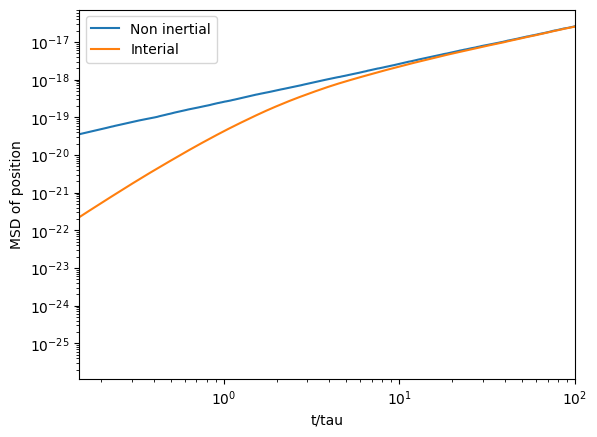

Time Averaged MSD non inertial 1.303159007900478e-17
Time averaged MSD inertial 1.2646616585881241e-17


In [17]:
#b)
N=10000

mass_matrix =[]
wo_mass_matrix=[]

for k in range(N):
    w2 = np.random.normal(0,1,size=(T,1))
    w2=w2.flatten()
    path_mass2=[0,0]
    path_wo_mass2=[0,0]

    for i in range (T):
        x = next_position_without_mass(path_wo_mass2[-1], w2[i])
        path_wo_mass2.append(x)

        y = next_position_with_mass (path_mass2[-2],
                                     path_mass2[-1], w2[i])
        path_mass2.append(y)
    
    wo_mass_matrix.append(path_wo_mass2)
    mass_matrix.append(path_mass2)

wo_mass_matrix = (np.array(wo_mass_matrix))**2
mass_matrix = (np.array(mass_matrix))**2


msd_wo_mass =[0,0]
msd_mass = [0,0]
for i in range(T):
    mean_column1 = np.mean(wo_mass_matrix[:,i])
    msd_wo_mass.append(mean_column1)

    mean_column2 = np.mean(mass_matrix[:,i])
    msd_mass.append(mean_column2)

plt.loglog(time_list, msd_wo_mass, label='Non inertial')
plt.loglog(time_list, msd_mass, label="Interial")
plt.legend()
plt.xlim(0.15,100)
plt.xlabel('t/tau')
plt.ylabel('MSD of position')
plt.show()
time_average_wo_mass = np.mean(msd_wo_mass)
time_average_mass = np.mean(msd_mass)

print('Time Averaged MSD non inertial', time_average_wo_mass )
print('Time averaged MSD inertial', time_average_mass )
    